In [1]:
# pip install -r requirements.txt

In [2]:
import os
import pandas as pd
import numpy as np
import math
import datetime as dt

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

from itertools import cycle
import plotly.graph_objects as go # add details
import plotly.express as px
from plotly.subplots import make_subplots

import seaborn as sns 
import matplotlib.pyplot as plt 
from colorama import Fore #for adding colours
from sklearn.model_selection import train_test_split

In [3]:
bitcoindf = pd.read_csv(r"../data/BTC-USD.csv")
bitcoindf = bitcoindf.rename(columns={'Date': 'date','Open':'open','High':'high','Low':'low','Close':'close',
                                'Adj Close':'adj_close','Volume':'volume'})
bitcoindf.head()

,date,open,high,low,close,adj_close,volume
0,2015-09-13,235.242004,235.934998,229.332001,230.511993,230.511993,18478800.0
1,2015-09-14,230.608994,232.440002,227.960999,230.643997,230.643997,20997800.0
2,2015-09-15,230.492004,259.182007,229.822006,230.304001,230.304001,19177800.0
3,2015-09-16,230.250000,231.214996,227.401993,229.091003,229.091003,20144200.0
4,2015-09-17,229.076004,230.285004,228.925995,229.809998,229.809998,18935400.0


In [4]:
#Convert Date column into Datatime format
bitcoindf['date'] = pd.to_datetime(bitcoindf.date)

Text(0.5, 1.0, 'Bitcoin Close Price')

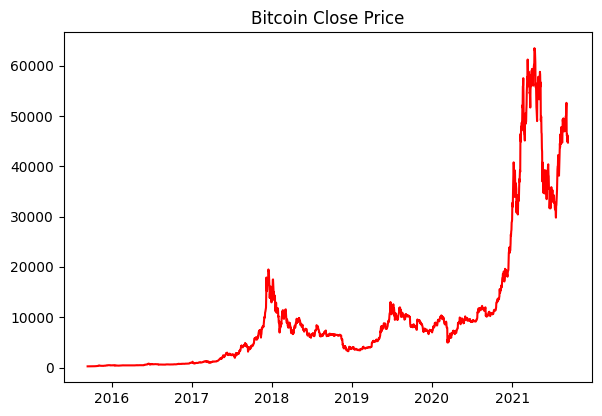

In [5]:
#Visualize close price of Bitcoin
fig = plt.figure(figsize = (15,10))

plt.subplot(2, 2, 1)
plt.plot(bitcoindf['date'], bitcoindf['close'], color="red")
plt.title('Bitcoin Close Price')

In [6]:
#Plotting only 2020-2021 year close price of Bitcoin, Cardano, Dogecoin and Ethereum
last1year_bitcoindf = bitcoindf[bitcoindf['date'] > '09-2020']

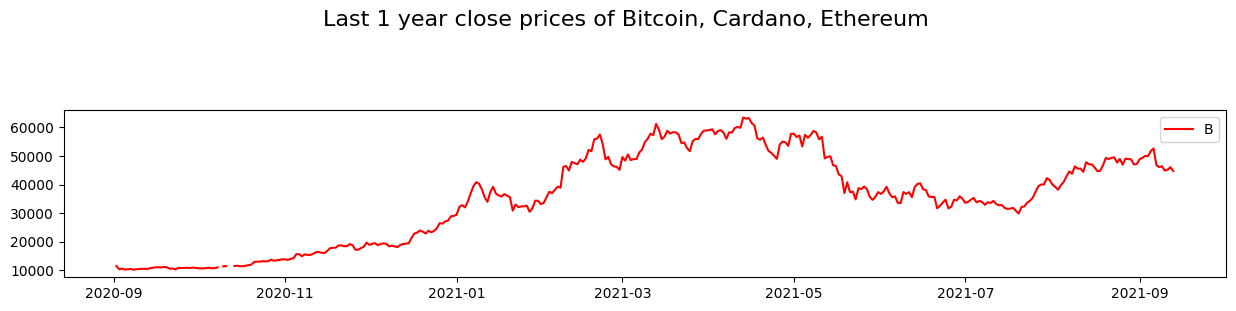

In [7]:
fig = plt.figure(figsize = (15,10))
fig.suptitle("Last 1 year close prices of Bitcoin, Cardano, Ethereum", fontsize=16)


plt.subplot(4, 1, 1)
plt.plot(last1year_bitcoindf['date'], last1year_bitcoindf['close'], color="red")
plt.legend("B")

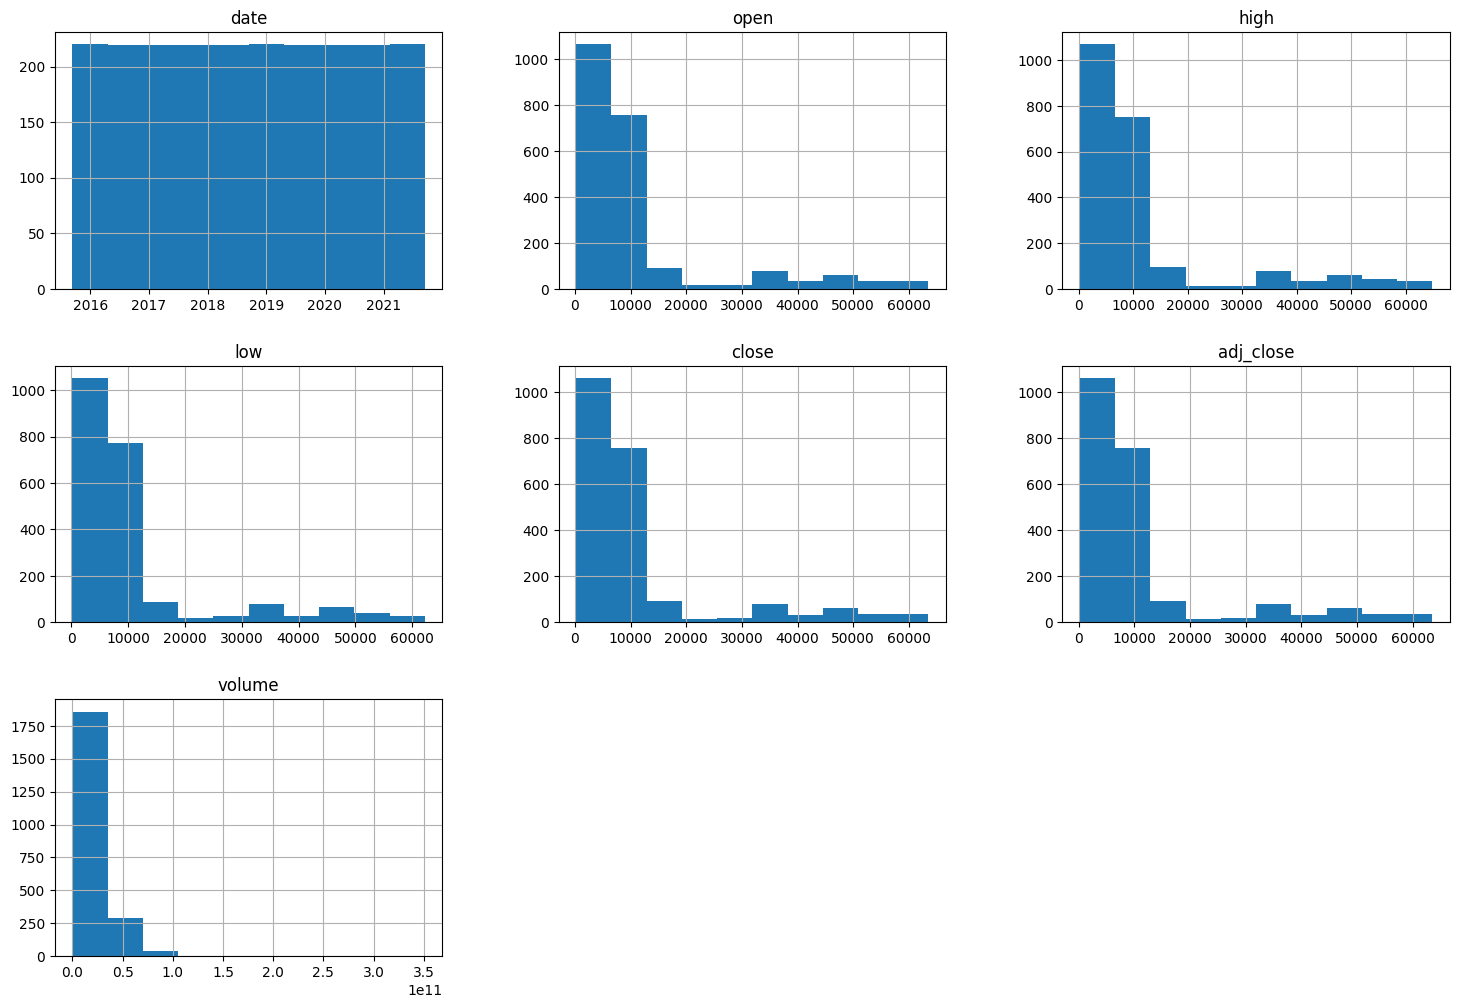

In [8]:
#histogram for all the coloumns of bitcoin dataset
bitcoin_numeric = bitcoindf.select_dtypes(exclude = ["bool"])
bitcoin_numeric.hist(figsize=(18,12))
plt.show()

In [9]:
closedf = bitcoindf[['date','close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (2193, 2)


In [10]:
print(closedf.isna().sum())
closedf = closedf.dropna()
print(closedf.isna().sum())

date     0
close    4
dtype: int64
date     0
close    0
dtype: int64


In [11]:
closedf = closedf[closedf['date'] > '2020-09-13']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  362


In [12]:
del closedf['date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(362, 1)


In [13]:
training_size=int(len(closedf)*0.70)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1] #splitting
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (253, 1)
test_data:  (109, 1)


In [14]:
train_data

array([[0.00853968],
       [0.01071908],
       [0.01405921],
       [0.0135728 ],
       [0.01349013],
       [0.01630108],
       [0.01337161],
       [0.00443705],
       [0.0058673 ],
       [0.        ],
       [0.00975428],
       [0.00894233],
       [0.00992112],
       [0.01029631],
       [0.00929965],
       [0.01169283],
       [0.01054391],
       [0.00746028],
       [0.00674392],
       [0.0063747 ],
       [0.00860708],
       [0.0108514 ],
       [0.00742901],
       [0.00850775],
       [0.01309676],
       [0.02009282],
       [0.02174117],
       [0.02259191],
       [0.02382775],
       [0.02057636],
       [0.02125166],
       [0.0236027 ],
       [0.02845798],
       [0.03172949],
       [0.04876018],
       [0.05142926],
       [0.05078448],
       [0.05409776],
       [0.05265459],
       [0.05348184],
       [0.0643489 ],
       [0.05716138],
       [0.06028836],
       [0.06232748],
       [0.06672844],
       [0.06590473],
       [0.06240194],
       [0.069

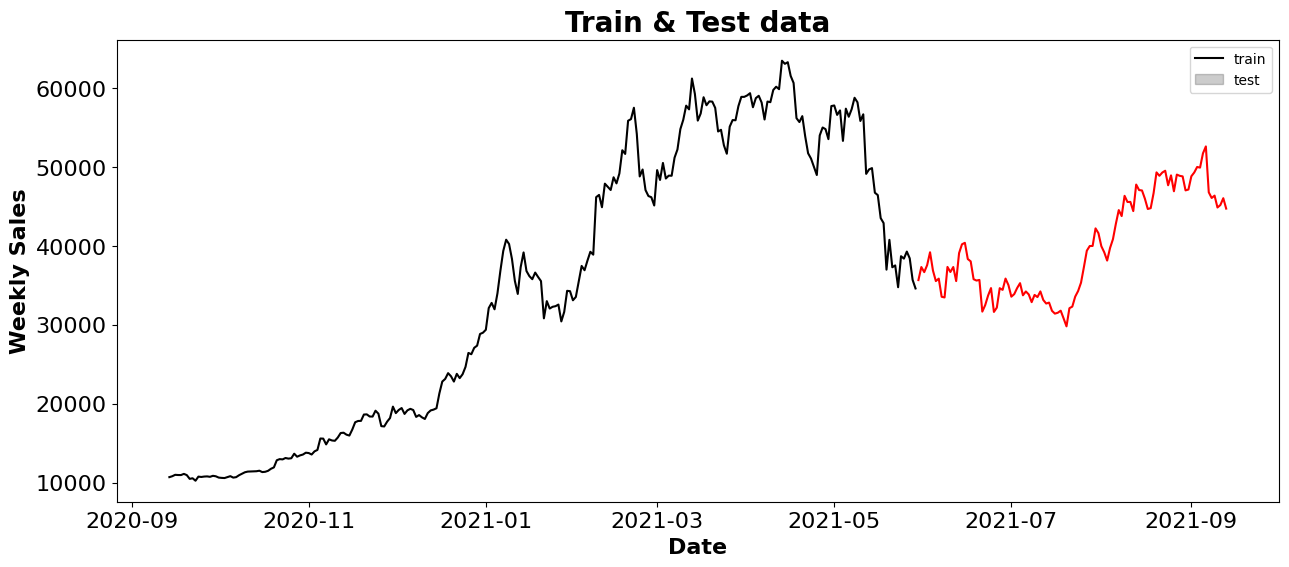

In [15]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(x = close_stock['date'][:255], y = close_stock['close'][:255], color = 'black')
sns.lineplot(x = close_stock['date'][255:], y = close_stock['close'][255:], color = 'red')

# Formatting
ax.set_title('Train & Test data', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Date', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Weekly Sales', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)
plt.legend(loc='upper right' ,labels = ('train', 'test'))

In [16]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [17]:
train_data

array([[0.00853968],
       [0.01071908],
       [0.01405921],
       [0.0135728 ],
       [0.01349013],
       [0.01630108],
       [0.01337161],
       [0.00443705],
       [0.0058673 ],
       [0.        ],
       [0.00975428],
       [0.00894233],
       [0.00992112],
       [0.01029631],
       [0.00929965],
       [0.01169283],
       [0.01054391],
       [0.00746028],
       [0.00674392],
       [0.0063747 ],
       [0.00860708],
       [0.0108514 ],
       [0.00742901],
       [0.00850775],
       [0.01309676],
       [0.02009282],
       [0.02174117],
       [0.02259191],
       [0.02382775],
       [0.02057636],
       [0.02125166],
       [0.0236027 ],
       [0.02845798],
       [0.03172949],
       [0.04876018],
       [0.05142926],
       [0.05078448],
       [0.05409776],
       [0.05265459],
       [0.05348184],
       [0.0643489 ],
       [0.05716138],
       [0.06028836],
       [0.06232748],
       [0.06672844],
       [0.06590473],
       [0.06240194],
       [0.069

In [18]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (237, 15)
y_train:  (237,)
X_test:  (93, 15)
y_test (93,)


In [19]:
# Check NaN
X_train

array([[0.00853968, 0.01071908, 0.01405921, ..., 0.00992112, 0.01029631,
        0.00929965],
       [0.01071908, 0.01405921, 0.0135728 , ..., 0.01029631, 0.00929965,
        0.01169283],
       [0.01405921, 0.0135728 , 0.01349013, ..., 0.00929965, 0.01169283,
        0.01054391],
       ...,
       [0.90106271, 0.85653143, 0.87238757, ..., 0.50825921, 0.51261266,
        0.46069495],
       [0.85653143, 0.87238757, 0.73060116, ..., 0.51261266, 0.46069495,
        0.53456087],
       [0.87238757, 0.73060116, 0.74121831, ..., 0.46069495, 0.53456087,
        0.52885945]])

In [20]:
X_train

array([[0.00853968, 0.01071908, 0.01405921, ..., 0.00992112, 0.01029631,
        0.00929965],
       [0.01071908, 0.01405921, 0.0135728 , ..., 0.01029631, 0.00929965,
        0.01169283],
       [0.01405921, 0.0135728 , 0.01349013, ..., 0.00929965, 0.01169283,
        0.01054391],
       ...,
       [0.90106271, 0.85653143, 0.87238757, ..., 0.50825921, 0.51261266,
        0.46069495],
       [0.85653143, 0.87238757, 0.73060116, ..., 0.51261266, 0.46069495,
        0.53456087],
       [0.87238757, 0.73060116, 0.74121831, ..., 0.46069495, 0.53456087,
        0.52885945]])

In [21]:
y_train

array([0.01169283, 0.01054391, 0.00746028, 0.00674392, 0.0063747 ,
       0.00860708, 0.0108514 , 0.00742901, 0.00850775, 0.01309676,
       0.02009282, 0.02174117, 0.02259191, 0.02382775, 0.02057636,
       0.02125166, 0.0236027 , 0.02845798, 0.03172949, 0.04876018,
       0.05142926, 0.05078448, 0.05409776, 0.05265459, 0.05348184,
       0.0643489 , 0.05716138, 0.06028836, 0.06232748, 0.06672844,
       0.06590473, 0.06240194, 0.06990625, 0.07334871, 0.10049224,
       0.10023007, 0.08648832, 0.09860999, 0.09584613, 0.09506882,
       0.10277258, 0.11356518, 0.11434346, 0.10965725, 0.10754472,
       0.12181945, 0.13926196, 0.14223881, 0.1424844 , 0.15757938,
       0.15797201, 0.15286234, 0.15275196, 0.16670424, 0.15965918,
       0.12997507, 0.1291826 , 0.14061352, 0.14924886, 0.17643387,
       0.16098951, 0.16846158, 0.17304712, 0.15905188, 0.16758201,
       0.17116496, 0.168284  , 0.15194531, 0.15631434, 0.15089135,
       0.14702316, 0.16100187, 0.16735964, 0.16931659, 0.17251

In [22]:
# Define model
from xgboost import XGBRegressor
my_model = XGBRegressor(n_estimators=1000)
my_model.fit(X_train, y_train, verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [23]:
predictions = my_model.predict(X_test)
print("Mean Absolute Error - MAE : " + str(mean_absolute_error(y_test, predictions)))
print("Root Mean squared Error - RMSE : " + str(math.sqrt(mean_squared_error(y_test, predictions))))

Mean Absolute Error - MAE : 0.028041100496356716
Root Mean squared Error - RMSE : 0.037365478723815765


In [24]:
train_predict=my_model.predict(X_train)
test_predict=my_model.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (237, 1)
Test data prediction: (93, 1)


In [25]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [26]:
def prediction_and_plot(closedf, close_stock, train_predict, test_predict):
    # shift train predictions for plotting

    look_back=time_step
    trainPredictPlot = np.empty_like(closedf)
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
    print("Train predicted data: ", trainPredictPlot.shape)

    # shift test predictions for plotting
    testPredictPlot = np.empty_like(closedf)
    testPredictPlot[:, :] = np.nan
    testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
    print("Test predicted data: ", testPredictPlot.shape)

    names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

    plotdf = pd.DataFrame({'date': close_stock['date'],
                        'original_close': close_stock['close'],
                        'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                        'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

    fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                            plotdf['test_predicted_close']],
                labels={'value':'Close price','date': 'Date'})
    fig.update_layout(title_text='BTC Comparision between original close price vs predicted close price',
                    plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
    fig.for_each_trace(lambda t:  t.update(name = next(names)))

    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    fig.show()

In [27]:
prediction_and_plot(closedf=closedf, close_stock=close_stock, train_predict=train_predict, test_predict=test_predict)

Train predicted data:  (362, 1)
Test predicted data:  (362, 1)


In [28]:
# 2) Người dùng chọn một hay nhiều đặc trưng để dự đoán :
# a. Close, ROC (bắt buộc)
# b. RSI, Bolling Bands, Moving Average,...(nâng cao)
# c. Đường hỗ trợ/kháng cự (nâng cao)

In [29]:
# After loading the Bitcoin data and before splitting into train/test

# Calculate ROC (Rate of Change)
def calculate_roc(data, period=12):
    return ((data / data.shift(period)) - 1) * 100

# Calculate RSI
def calculate_rsi(data, period=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

# Calculate Bollinger Bands
def calculate_bollinger_bands(data, period=20, num_std=2):
    sma = data.rolling(window=period).mean()
    std = data.rolling(window=period).std()
    upper_band = sma + (std * num_std)
    lower_band = sma - (std * num_std)
    return sma, upper_band, lower_band

# Add new features
bitcoindf['ROC'] = calculate_roc(bitcoindf['close'])
bitcoindf['RSI'] = calculate_rsi(bitcoindf['close'])
bitcoindf['SMA'], bitcoindf['Upper_BB'], bitcoindf['Lower_BB'] = calculate_bollinger_bands(bitcoindf['close'])


In [30]:
bitcoindf

,date,open,high,low,close,adj_close,volume,ROC,RSI,SMA,Upper_BB,Lower_BB
0,2015-09-13,235.242004,235.934998,229.332001,230.511993,230.511993,1.847880e+07,NaN,NaN,NaN,NaN,NaN
1,2015-09-14,230.608994,232.440002,227.960999,230.643997,230.643997,2.099780e+07,NaN,NaN,NaN,NaN,NaN
2,2015-09-15,230.492004,259.182007,229.822006,230.304001,230.304001,1.917780e+07,NaN,NaN,NaN,NaN,NaN
3,2015-09-16,230.250000,231.214996,227.401993,229.091003,229.091003,2.014420e+07,NaN,NaN,NaN,NaN,NaN
4,2015-09-17,229.076004,230.285004,228.925995,229.809998,229.809998,1.893540e+07,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2188,2021-09-09,45774.742188,47261.949219,45669.738281,46391.421875,46391.421875,3.867266e+10,-5.134677,48.351141,48711.031445,52106.105140,45315.957751
2189,2021-09-10,46396.664063,47031.742188,44344.484375,44883.910156,44883.910156,3.915467e+10,-8.080965,37.029614,48509.952344,52308.882439,44711.022248
2190,2021-09-11,44869.839844,45969.292969,44818.265625,45201.457031,45201.457031,3.449984e+10,-3.939067,38.615771,48303.942578,52355.969121,44251.916035
2191,2021-09-12,45206.628906,46364.878906,44790.460938,46063.269531,46063.269531,2.788198e+10,-2.339401,41.884031,48129.798633,52255.734158,44003.863108


In [31]:
import ipywidgets as widgets
from IPython.display import display, clear_output

def select_features():
    feature_options = [
        ('Close (required)', 1),
        ('ROC (required)', 2),
        ('RSI', 3),
        ('Bollinger Bands', 4),
        ('Moving Average', 5)
    ]
    
    selected_features = [1, 2]  # Close and ROC are required
    
    checkboxes = [widgets.Checkbox(
        value=feature[1] in selected_features,
        description=feature[0],
        disabled=feature[1] in [1, 2],  # Disable required features
        indent=False
    ) for feature in feature_options]
    
    output = widgets.Output()
    
    def on_checkbox_change(change):
        with output:
            clear_output()
            if change['new']:
                if change['owner'].description.split()[0] not in ['Close', 'ROC']:
                    selected_features.append(feature_options[[c.description for c in checkboxes].index(change['owner'].description)][1])
            else:
                if change['owner'].description.split()[0] not in ['Close', 'ROC']:
                    selected_features.remove(feature_options[[c.description for c in checkboxes].index(change['owner'].description)][1])
            print(f"Selected features: {[feature_options[i-1][0] for i in selected_features]}")
    
    for checkbox in checkboxes:
        checkbox.observe(on_checkbox_change, names='value')
    
    display(widgets.VBox(checkboxes))
    display(output)
    
    return selected_features

# Get user-selected features
selected_features = select_features()

Output()

In [32]:
# Prepare the dataset based on selected features
feature_columns = ['close', 'ROC']
if 3 in selected_features:
    feature_columns.append('RSI')
if 4 in selected_features:
    feature_columns.extend(['SMA', 'Upper_BB', 'Lower_BB'])
if 5 in selected_features and 'SMA' not in feature_columns:
    feature_columns.append('SMA')

# Calculate selected features
bitcoindf['ROC'] = calculate_roc(bitcoindf['close'])
if 'RSI' in feature_columns:
    bitcoindf['RSI'] = calculate_rsi(bitcoindf['close'])
if any(col in feature_columns for col in ['SMA', 'Upper_BB', 'Lower_BB']):
    bitcoindf['SMA'], bitcoindf['Upper_BB'], bitcoindf['Lower_BB'] = calculate_bollinger_bands(bitcoindf['close'])

# Use only selected features for prediction
closedf = bitcoindf[['date'] + feature_columns].dropna()

# Continue with the rest of your code, using 'closedf' for prediction

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(closedf.drop('date', axis=1))

# Split the data
training_size = int(len(scaled_data) * 0.70)
train_data, test_data = scaled_data[:training_size, :], scaled_data[training_size:, :]

# Create datasets
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Train the model
from xgboost import XGBRegressor
my_model = XGBRegressor(n_estimators=1000)
my_model.fit(X_train, y_train, verbose=False)

# Make predictions
train_predict = my_model.predict(X_train)
test_predict = my_model.predict(X_test)

# Inverse transform predictions (only for close price)
# Inverse transform predictions (only for close price)
train_predict = scaler.inverse_transform(
    np.column_stack((
        train_predict,
        np.zeros((len(train_predict), len(feature_columns)-1))
    ))
)[:, 0]

test_predict = scaler.inverse_transform(
    np.column_stack((
        test_predict,
        np.zeros((len(test_predict), len(feature_columns)-1))
    ))
)[:, 0]

original_ytrain = scaler.inverse_transform(
    np.column_stack((
        y_train,
        np.zeros((len(y_train), len(feature_columns)-1))
    ))
)[:, 0]

original_ytest = scaler.inverse_transform(
    np.column_stack((
        y_test,
        np.zeros((len(y_test), len(feature_columns)-1))
    ))
)[:, 0]

In [33]:
def prediction_and_plot(closedf, close_stock, train_predict, test_predict, feature_columns):
    # shift train predictions for plotting
    look_back = time_step
    trainPredictPlot = np.empty_like(closedf)
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[look_back:len(train_predict)+look_back, 0] = train_predict
    print("Train predicted data: ", trainPredictPlot.shape)

    # shift test predictions for plotting
    testPredictPlot = np.empty_like(closedf)
    testPredictPlot[:, :] = np.nan
    testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, 0] = test_predict
    print("Test predicted data: ", testPredictPlot.shape)

    names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

    plotdf = pd.DataFrame({
        'date': close_stock['date'],
        'original_close': close_stock['close'],
        'train_predicted_close': trainPredictPlot[:, 0],
        'test_predicted_close': testPredictPlot[:, 0]
    })

    fig = px.line(plotdf, x=plotdf['date'], y=[plotdf['original_close'], plotdf['train_predicted_close'],
                                               plotdf['test_predicted_close']],
                  labels={'value': 'Close price', 'date': 'Date'})
    fig.update_layout(title_text=f'BTC (Features: {", ".join(feature_columns)})',
                      plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
    fig.for_each_trace(lambda t:  t.update(name = next(names)))

    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    fig.show()

# Call the function with the new arguments
prediction_and_plot(closedf=closedf.drop('date', axis=1).values, 
                    close_stock=closedf, 
                    train_predict=train_predict, 
                    test_predict=test_predict, 
                    feature_columns=feature_columns)

Train predicted data:  (2173, 2)
Test predicted data:  (2173, 2)


In [34]:
def predict_next_timeframe(model, scaler, last_sequence, feature_columns):
    # Reshape last_sequence to match the input shape expected by the model
    last_sequence = last_sequence.reshape(1, -1)
    
    # Make the prediction
    next_pred = model.predict(last_sequence)
    
    # Prepare the prediction for inverse scaling
    if len(feature_columns) > 1:
        next_pred = np.column_stack((next_pred, np.zeros((len(next_pred), len(feature_columns)-1))))
    else:
        next_pred = next_pred.reshape(-1, 1)
    
    # Inverse transform the prediction
    next_pred_original = scaler.inverse_transform(next_pred)[:, 0]
    
    return next_pred_original[0]

# After making predictions for train and test data, add:
last_sequence = X_test[-1]
next_timeframe_pred = predict_next_timeframe(my_model, scaler, last_sequence, feature_columns)
print(f"Predicted price for the next timeframe: {next_timeframe_pred:.2f}")

Predicted price for the next timeframe: 14803.65


In [35]:
print("Shape of X_test:", X_test.shape)
print("Shape of last_sequence:", last_sequence.shape)
print("Number of features:", len(feature_columns))
print("Scaler n_features_in_:", scaler.n_features_in_)

Shape of X_test: (636, 15)
Shape of last_sequence: (15,)
Number of features: 2
Scaler n_features_in_: 2


In [36]:
import plotly.graph_objects as go
from itertools import cycle

def prediction_and_plot_3(closedf, close_stock, train_predict, test_predict, next_timeframe_pred, feature_columns):
    # shift train predictions for plotting
    look_back = 15  # Assuming this is your time step
    trainPredictPlot = np.empty_like(closedf)
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[look_back:len(train_predict)+look_back, 0] = train_predict

    # shift test predictions for plotting
    testPredictPlot = np.empty_like(closedf)
    testPredictPlot[:, :] = np.nan
    testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, 0] = test_predict

    # Create a DataFrame for plotting
    plotdf = pd.DataFrame({
        'date': close_stock['date'],
        'original_close': close_stock['close'],
        'train_predicted_close': trainPredictPlot[:, 0],
        'test_predicted_close': testPredictPlot[:, 0]
    })

    # Add the next timeframe prediction
    next_date = pd.to_datetime(plotdf['date'].iloc[-1]) + pd.Timedelta(days=1)
    next_timeframe_df = pd.DataFrame({
        'date': [next_date],
        'original_close': [np.nan],
        'train_predicted_close': [np.nan],
        'test_predicted_close': [np.nan]
    })
    plotdf = pd.concat([plotdf, next_timeframe_df], ignore_index=True)

    # Create the plot
    fig = go.Figure()

    # Add traces
    fig.add_trace(go.Scatter(x=plotdf['date'], y=plotdf['original_close'], mode='lines', name='Original close price'))
    fig.add_trace(go.Scatter(x=plotdf['date'], y=plotdf['train_predicted_close'], mode='lines', name='Train predicted close price'))
    fig.add_trace(go.Scatter(x=plotdf['date'], y=plotdf['test_predicted_close'], mode='lines', name='Test predicted close price'))
    
    # Add the next timeframe prediction as a star marker
    fig.add_trace(go.Scatter(x=[next_date], y=[next_timeframe_pred], mode='markers', 
                             marker=dict(symbol='star', size=12, color='red'),
                             name='Next timeframe prediction'))

    # Update layout
    fig.update_layout(
        title=f'BTC Comparison between original close price vs predicted close price (Features: {", ".join(feature_columns)})',
        xaxis_title='Date',
        yaxis_title='Close Price',
        legend_title='Price Type',
        font=dict(size=12),
        showlegend=True
    )

    # Show the plot
    fig.show()

# Call the function with the new arguments
prediction_and_plot_3(closedf=closedf.drop('date', axis=1).values, 
                    close_stock=closedf, 
                    train_predict=train_predict, 
                    test_predict=test_predict, 
                    next_timeframe_pred=next_timeframe_pred,
                    feature_columns=feature_columns)

In [37]:
# Biểu đồ này hiển thị sự so sánh giữa giá đóng ban đầu của Bitcoin (BTC) và giá đóng dự đoán từ mô hình học máy. Đây là bảng phân tích những gì chúng ta đang thấy:

# Đường màu xanh lam: Giá đóng ban đầu của Bitcoin từ năm 2016 đến năm 2022.
# Đường màu đỏ: Giá đóng dự đoán của tàu (dự đoán của mô hình trên dữ liệu đào tạo).
# Đường màu xanh lá cây: Kiểm tra giá đóng dự đoán (dự đoán của mô hình trên dữ liệu thử nghiệm).
# Sao đỏ: Dự đoán khung thời gian tiếp theo (dự đoán của mô hình cho điểm dữ liệu tiếp theo sau dữ liệu có sẵn).

# Những quan sát chính:

# Mô hình này dường như nắm bắt xu hướng chung về biến động giá của Bitcoin, nhưng nó đánh giá thấp mức độ thay đổi giá, đặc biệt là trong đợt tăng giá mạnh mẽ vào năm 2021.
# Các dự đoán về tàu (màu đỏ) bao gồm phần trước của dữ liệu, trong khi các dự đoán thử nghiệm (màu xanh lá cây) bao gồm phần sau.
# Dự đoán của mô hình mượt mà hơn so với biến động giá thực tế, thiếu một số biến động ngắn hạn.
# Dự đoán khung thời gian tiếp theo (sao đỏ) cho thấy giá sẽ tăng nhẹ trong thời gian tới, nhưng điều quan trọng cần lưu ý là giá tiền điện tử rất biến động và khó dự đoán chính xác.
# Mô hình này dường như gặp khó khăn trong việc nắm bắt các mức giá tăng đột biến, đặc biệt là mức giá được thấy vào năm 2021 khi giá thực tế vượt xa dự đoán của mô hình.
# Các tính năng được sử dụng để dự đoán là 'đóng' (giá đóng cửa) và 'ROC' (Tỷ lệ thay đổi), như đã đề cập trong tiêu đề.

# Nhìn chung, mặc dù mô hình nắm bắt được xu hướng chung nhưng nó dường như đang phải vật lộn với đặc điểm biến động cực độ của thị trường tiền điện tử. Hình ảnh trực quan này nêu bật những thách thức trong việc dự đoán các tài sản dễ biến động như vậy và gợi ý rằng mô hình có thể được hưởng lợi từ việc cải tiến thêm hoặc các tính năng bổ sung để nắm bắt tốt hơn các biến động giá nhanh chóng.

In [38]:
# 4) Lấy dữ liệu Real-time từ websocket của Binance, chứng khoán,...
# a. Lấy dữ liệu lớn hơn 1000 nến(candle) từ lịch sử
# b. Lấy dữ liệu real-time append vô dữ liệu hiện tại
# c. Dự đoán giá nến(candle) kế tiếp

In [39]:
pip install python-binance websocket-client

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
import asyncio
from binance.client import Client
from binance.streams import BinanceSocketManager
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# Initialize Binance client (use your API key and secret if you have one)
client = Client()

def get_historical_data(symbol, interval, limit=1000):
    klines = client.get_klines(symbol=symbol, interval=interval, limit=limit)
    df = pd.DataFrame(klines, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df['close'] = df['close'].astype(float)
    return df[['timestamp', 'close']]

def calculate_roc(data, period=12):
    return ((data / data.shift(period)) - 1) * 100

def create_dataset(dataset, time_step=1):
    X, y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), :]
        X.append(a)
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

# Get historical data and prepare for modeling
symbol = 'BTCUSDT'
interval = Client.KLINE_INTERVAL_1HOUR
historical_data = get_historical_data(symbol, interval, limit=1000)
historical_data['ROC'] = calculate_roc(historical_data['close'])
historical_data = historical_data.dropna()

# Prepare data for modeling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(historical_data[['close', 'ROC']])

# Create dataset for training
time_step = 15
X, y = create_dataset(scaled_data, time_step)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
model = XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                     colsample_bytree=1, max_depth=7)
model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

print("Model trained. Starting real-time predictions...")

# Initialize a list to store real-time data
realtime_data = []

async def handle_socket_message(msg):
    global historical_data, realtime_data
    if msg['e'] == 'kline':
        candle = msg['k']
        timestamp = pd.to_datetime(candle['t'], unit='ms')
        close = float(candle['c'])
        
        # Append to realtime data
        realtime_data.append({'timestamp': timestamp, 'close': close})
        
        # If we have enough data for ROC calculation
        if len(realtime_data) > 12:
            df_realtime = pd.DataFrame(realtime_data)
            df_realtime['ROC'] = calculate_roc(df_realtime['close'])
            
            # Append to historical data
            historical_data = pd.concat([historical_data, df_realtime.iloc[[-1]]])
            
            # Keep only the last 1000 candles
            historical_data = historical_data.iloc[-1000:]
            
            # Predict next candle
            next_candle_price = predict_next_candle(historical_data)
            
            print(f"Timestamp: {timestamp}, Latest close: {close:.2f}, Next candle prediction: {next_candle_price:.2f}")
        
        # Clear realtime data to avoid memory issues
        realtime_data = realtime_data[-12:]

async def main():
    bm = BinanceSocketManager(client)
    async with bm.kline_socket(symbol=symbol, interval=interval) as stream:
        while True:
            msg = await stream.recv()
            await handle_socket_message(msg)

def predict_next_candle(data):
    # Prepare the data for prediction
    last_sequence = data[['close', 'ROC']].values[-time_step:]
    last_sequence_scaled = scaler.transform(last_sequence)
    X = last_sequence_scaled.reshape((1, time_step, 2))
    
    # Make prediction
    next_pred_scaled = model.predict(X.reshape(1, -1))
    
    # Inverse transform
    next_pred = scaler.inverse_transform(
        np.column_stack((
            next_pred_scaled, 
            np.zeros((len(next_pred_scaled), 1))
        ))
    )[:, 0]
    
    return next_pred[0]

Model trained. Starting real-time predictions...


In [ ]:
import asyncio
from threading import Thread
async def run_main():
    bm = BinanceSocketManager(client)
    async with bm.kline_socket(symbol=symbol, interval=interval) as stream:
        while True:
            msg = await stream.recv()
            await handle_socket_message(msg)

def run_async_loop(loop):
    asyncio.set_event_loop(loop)
    loop.run_until_complete(run_main())

def start_background_loop():
    loop = asyncio.new_event_loop()
    t = Thread(target=run_async_loop, args=(loop,), daemon=True)
    t.start()
    return loop, t

# Global variables to store the loop and thread
background_loop = None
background_thread = None

def start():
    global background_loop, background_thread
    background_loop, background_thread = start_background_loop()
    print("Websocket stream started in the background. Use stop() to halt.")

def stop():
    global background_loop, background_thread
    if background_loop:
        try:
            background_loop.call_soon_threadsafe(background_loop.stop)
            background_thread.join()
        except RuntimeError as e:
            if "Event loop stopped before Future completed" not in str(e):
                print(f"Unexpected error while stopping: {e}")
        finally:
            background_loop = None
            background_thread = None
            print("Websocket stream stopped.")
    else:
        print("No active websocket stream to stop.")

if __name__ == "__main__":
    start()

Websocket stream started in the background. Use stop() to halt.


d:\download_setup\python\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



Timestamp: 2024-07-21 05:00:00, Latest close: 67083.92, Next candle prediction: 66951.63


d:\download_setup\python\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



Timestamp: 2024-07-21 05:00:00, Latest close: 67076.00, Next candle prediction: 66957.84


d:\download_setup\python\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



Timestamp: 2024-07-21 05:00:00, Latest close: 67076.01, Next candle prediction: 66821.78


d:\download_setup\python\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



Timestamp: 2024-07-21 05:00:00, Latest close: 67076.01, Next candle prediction: 66839.86


d:\download_setup\python\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



Timestamp: 2024-07-21 05:00:00, Latest close: 67076.01, Next candle prediction: 66836.41


d:\download_setup\python\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



Timestamp: 2024-07-21 05:00:00, Latest close: 67076.00, Next candle prediction: 66858.49


d:\download_setup\python\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



Timestamp: 2024-07-21 05:00:00, Latest close: 67076.00, Next candle prediction: 66820.24


d:\download_setup\python\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



Timestamp: 2024-07-21 05:00:00, Latest close: 67076.00, Next candle prediction: 66852.13


d:\download_setup\python\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



Timestamp: 2024-07-21 05:00:00, Latest close: 67076.00, Next candle prediction: 66845.27


d:\download_setup\python\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



Timestamp: 2024-07-21 05:00:00, Latest close: 67064.29, Next candle prediction: 66871.28


d:\download_setup\python\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



Timestamp: 2024-07-21 05:00:00, Latest close: 67064.01, Next candle prediction: 66854.85


d:\download_setup\python\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



Timestamp: 2024-07-21 05:00:00, Latest close: 67064.02, Next candle prediction: 66962.89


d:\download_setup\python\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



Timestamp: 2024-07-21 05:00:00, Latest close: 67064.01, Next candle prediction: 66959.61


d:\download_setup\python\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



Timestamp: 2024-07-21 05:00:00, Latest close: 67064.01, Next candle prediction: 66930.28


d:\download_setup\python\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



Timestamp: 2024-07-21 05:00:00, Latest close: 67064.01, Next candle prediction: 66946.98


d:\download_setup\python\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



Timestamp: 2024-07-21 05:00:00, Latest close: 67064.01, Next candle prediction: 66946.98


d:\download_setup\python\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



Timestamp: 2024-07-21 05:00:00, Latest close: 67071.58, Next candle prediction: 66948.60


d:\download_setup\python\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



Timestamp: 2024-07-21 05:00:00, Latest close: 67071.58, Next candle prediction: 66955.81


d:\download_setup\python\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



Timestamp: 2024-07-21 05:00:00, Latest close: 67071.59, Next candle prediction: 66810.10


d:\download_setup\python\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



Timestamp: 2024-07-21 05:00:00, Latest close: 67071.58, Next candle prediction: 66810.10


d:\download_setup\python\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



Timestamp: 2024-07-21 05:00:00, Latest close: 67071.58, Next candle prediction: 66810.10


d:\download_setup\python\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



Timestamp: 2024-07-21 05:00:00, Latest close: 67071.59, Next candle prediction: 66810.10


d:\download_setup\python\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



Timestamp: 2024-07-21 05:00:00, Latest close: 67071.58, Next candle prediction: 66810.10


d:\download_setup\python\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



Timestamp: 2024-07-21 05:00:00, Latest close: 67071.59, Next candle prediction: 66810.10


d:\download_setup\python\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



Timestamp: 2024-07-21 05:00:00, Latest close: 67071.59, Next candle prediction: 66806.43


d:\download_setup\python\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



Timestamp: 2024-07-21 05:00:00, Latest close: 67072.00, Next candle prediction: 66815.89


d:\download_setup\python\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



Timestamp: 2024-07-21 05:00:00, Latest close: 67075.34, Next candle prediction: 66815.89


d:\download_setup\python\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



Timestamp: 2024-07-21 05:00:00, Latest close: 67075.35, Next candle prediction: 66815.89


d:\download_setup\python\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



Timestamp: 2024-07-21 05:00:00, Latest close: 67084.00, Next candle prediction: 66815.89


d:\download_setup\python\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



Timestamp: 2024-07-21 05:00:00, Latest close: 67084.00, Next candle prediction: 66815.89


d:\download_setup\python\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



Timestamp: 2024-07-21 05:00:00, Latest close: 67084.00, Next candle prediction: 66815.89


d:\download_setup\python\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



Timestamp: 2024-07-21 05:00:00, Latest close: 67084.00, Next candle prediction: 66815.89


d:\download_setup\python\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



Timestamp: 2024-07-21 05:00:00, Latest close: 67083.99, Next candle prediction: 66815.89


d:\download_setup\python\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



Timestamp: 2024-07-21 05:00:00, Latest close: 67083.99, Next candle prediction: 66815.89


d:\download_setup\python\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



Timestamp: 2024-07-21 05:00:00, Latest close: 67084.00, Next candle prediction: 66815.89


d:\download_setup\python\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



Timestamp: 2024-07-21 05:00:00, Latest close: 67084.00, Next candle prediction: 66815.89


d:\download_setup\python\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



Timestamp: 2024-07-21 05:00:00, Latest close: 67083.99, Next candle prediction: 66815.89


d:\download_setup\python\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



Timestamp: 2024-07-21 05:00:00, Latest close: 67083.99, Next candle prediction: 66815.89


d:\download_setup\python\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



Timestamp: 2024-07-21 05:00:00, Latest close: 67084.00, Next candle prediction: 66815.89


d:\download_setup\python\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



Timestamp: 2024-07-21 05:00:00, Latest close: 67083.99, Next candle prediction: 66815.89


d:\download_setup\python\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



Timestamp: 2024-07-21 05:00:00, Latest close: 67084.00, Next candle prediction: 66815.89


d:\download_setup\python\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



Timestamp: 2024-07-21 05:00:00, Latest close: 67083.99, Next candle prediction: 66815.89


In [ ]:
start()

Websocket stream started in the background. Use stop() to halt.


: 

In [48]:
stop()

Exception in thread Thread-8 (run_async_loop):
Traceback (most recent call last):
  File "d:\download_setup\python\Python\Python312\Lib\threading.py", line 1073, in _bootstrap_inner
    self.run()
  File "d:\download_setup\python\Python\Python312\Lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "d:\download_setup\python\Python\Python312\Lib\threading.py", line 1010, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_4284\1857014524.py", line 12, in run_async_loop
  File "d:\download_setup\python\Python\Python312\Lib\asyncio\base_events.py", line 683, in run_until_complete
    raise RuntimeError('Event loop stopped before Future completed.')
RuntimeError: Event loop stopped before Future completed.


Websocket stream stopped.
